# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

## Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### a. Business Objectives
As a business, car dealerships need to build up inventory. To optimize the profitability of the business, it is important for dealerships have a high churn rate of their inventory and maximize the pricing of vehicles. The higher the churn rate the higher the dealerships revenue will be. To achieve such a feat, it is important for the dealers to understand the price at which a used car can be sold. Pricing a used car too high will keep it in their inventory for a longer period of time. Hence, it is important to identify the drivers of value for potential clients to adequatly price each vehicle on the lot.

### b. Data Mining Goal

To adequatly price a vehicle, we will investigate past transactions and explore the various features impacting a the price at which a vehicle was sold. Using a regression model, we can help make inferences about the optimal price at which a car can be sold.

### c. Preliminary Project Plan

Step 1: includes preliminary data exploration to better understanding the data at hand and potential hidden trends to further explore through models.

Step 2: we will clean and use feature engineering if necessary.

Step 3: Using the final dataset constructed, we will explore linear regression, polynomial regression and feature importance in the prediction of used car prices. Such exploration will be conducted using cross-validation, grid-search, sequential feature selection and ridge regression

## Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [684]:
# Import Libraries

import pandas as pd
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.inspection import permutation_importance
from sklearn.compose import make_column_transformer, TransformedTargetRegressor, ColumnTransformer
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso, ARDRegression, BayesianRidge
from sklearn.kernel_ridge import KernelRidge 
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, mean_absolute_percentage_error
import io

### a. Data Collection

In [685]:
# Import Data
df = pd.read_csv('data/vehicles.csv')

#### Data Description

In [686]:
# Preview of the data in hand
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


The data has 18 features:  
1- "id" -- The transaction id for each vehicle sold  
2- "region" -- The region in which the vehicle was sold  
3- "price" -- The price at which the vehicle was sold  
4- "year" -- The year in which the vehicle was manufactured  
5- "manufacturer" -- The carmaker/manufacturer for each vehicle  
6- "model" -- The car model  
7- "condition" -- The vehicle's condition when it was sold (nan, 'good', 'excellent', 'fair', 'like new', 'new', 'salvage')  
8- "cylinders" -- Size of the engine in each vehicle (nan, '8 cylinders', '6 cylinders', '4 cylinders', '5 cylinders',
       'other', '3 cylinders', '10 cylinders', '12 cylinders')  
9- "fuel" -- The fuel type the vehicle takes (nan, 'gas', 'other', 'diesel', 'hybrid', 'electric')  
10- "odometer" -- The number of km/miles the vehicle has.  
11- "title_status" -- The type of status of the vehicle (nan, 'clean', 'rebuilt', 'lien', 'salvage', 'missing',
       'parts only')  
12- "transmission" -- The transmission type of the vehicle (nan, 'other', 'automatic', 'manual')  
13- "VIN" -- Vehicle identification number  
14- "drive" -- Type of vehicle traction (nan, 'rwd', '4wd', 'fwd')  
15 - "size" -- Vehicle size (nan, 'full-size', 'mid-size', 'compact', 'sub-compact')  
16- "type" -- Type of vehicle (nan, 'pickup', 'truck', 'other', 'coupe', 'SUV', 'hatchback',
       'mini-van', 'sedan', 'offroad', 'bus', 'van', 'convertible',
       'wagon')  
17- "paint_color" -- The vehicle color  
18- "state" -- State in which the transaction took place  

In [687]:
# Number of observation and data type for each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

##### As we can see there are 2 float, 2 integer and 14 object data types. There is 426,880 observations with many of the features having missing values.

In [688]:
# number of unique answers for each feature
unique = df.nunique(axis = 0)
unique

id              426880
region             404
price            15655
year               114
manufacturer        42
model            29649
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118246
drive                3
size                 4
type                13
paint_color         12
state               51
dtype: int64

In [689]:
# Description of the number data types
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


##### At first glance there seems to be outliers/mistakes in the price of vehicles as we can see the maximum is 373,692,900$ which is very unlikely. Similarly, a vehicle with 1 million km/miles is unlikely. We will explore outliers and how to address later on in the process.

### b. Identify Data Quality & Problems

In [690]:
# Explore the number of null values in each column
df.isna().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [691]:
# For better interpretation let's convert it into a percentage
df.isna().sum()/df.shape[0]*100

id               0.000000
region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
VIN             37.725356
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
state            0.000000
dtype: float64

##### We can see that Size (72%), Cylinders (42%), Condition (41%), VIN (38%), Drive (31%), Paint_color (31%) and type (22%) lack a lot of observations. We will further explore how to overcome to issue later.

In [692]:
#Explore the object features
df_ = df.select_dtypes(exclude=['int', 'float'])
for col in df_.columns:
    print('\n-----------\n')
    print(df_[col].nunique())
    print(df_[col].unique()) # to print categories name only
    print(df_[col].value_counts()) # to print count of every category


-----------

404
['prescott' 'fayetteville' 'florida keys' 'worcester / central MA'
 'greensboro' 'hudson valley' 'medford-ashland' 'erie' 'el paso'
 'bellingham' 'skagit / island / SJI' 'la crosse' 'auburn' 'birmingham'
 'dothan' 'florence / muscle shoals' 'gadsden-anniston'
 'huntsville / decatur' 'mobile' 'montgomery' 'tuscaloosa'
 'anchorage / mat-su' 'fairbanks' 'kenai peninsula' 'southeast alaska'
 'flagstaff / sedona' 'mohave county' 'phoenix' 'show low' 'sierra vista'
 'tucson' 'yuma' 'fort smith' 'jonesboro' 'little rock' 'texarkana'
 'bakersfield' 'chico' 'fresno / madera' 'gold country' 'hanford-corcoran'
 'humboldt county' 'imperial county' 'inland empire' 'los angeles'
 'mendocino county' 'merced' 'modesto' 'monterey bay' 'orange county'
 'palm springs' 'redding' 'reno / tahoe' 'sacramento' 'san diego'
 'san luis obispo' 'santa barbara' 'santa maria' 'SF bay area'
 'siskiyou county' 'stockton' 'susanville' 'ventura county'
 'visalia-tulare' 'yuba-sutter' 'boulder' 'colora

Name: condition, dtype: int64

-----------

8
[nan '8 cylinders' '6 cylinders' '4 cylinders' '5 cylinders' 'other'
 '3 cylinders' '10 cylinders' '12 cylinders']
6 cylinders     94169
4 cylinders     77642
8 cylinders     72062
5 cylinders      1712
10 cylinders     1455
other            1298
3 cylinders       655
12 cylinders      209
Name: cylinders, dtype: int64

-----------

5
[nan 'gas' 'other' 'diesel' 'hybrid' 'electric']
gas         356209
other        30728
diesel       30062
hybrid        5170
electric      1698
Name: fuel, dtype: int64

-----------

6
[nan 'clean' 'rebuilt' 'lien' 'salvage' 'missing' 'parts only']
clean         405117
rebuilt         7219
salvage         3868
lien            1422
missing          814
parts only       198
Name: title_status, dtype: int64

-----------

3
[nan 'other' 'automatic' 'manual']
automatic    336524
other         62682
manual        25118
Name: transmission, dtype: int64

-----------

118246
[nan '3GTP1VEC4EG551563' '1GCSCSE06AZ123805'

##### Exploring categorical unique values we discover that the "model" feature has some discrepencies in the way it was recorded. We will investigate further by drawing a random sample from our data

In [693]:
#Create a random_sampling function to observe samples of the model feature
def random_sampling(df, n):
    random_sample = np.random.choice(df,replace = False, size = n)
    return(random_sample)
RandomSample = random_sampling(df['model'], 100)
RandomSample

array(['tl', 'sonata', 'corolla', 'x5 xdrive40e iperformance',
       'enclave premium sport', 'c4500', 'silverado 2500hd', 'taurus',
       'rlx', 'lucerne cxl v6 - gold', 'gti', 'civic sedan lx',
       'mx-5 miata grand touring', 'sierra', 'sienna xle',
       'Genesis G80 3.8 Sedan 4D', 'pacifica limited', 'IH, Metro van',
       'mustang', 'charger', 'accord', 'optima ex', 'prius prius ii',
       'escape', 'ecosport ses sport utility', 's60 t5 cross country',
       'g35 journey', 'challenger gt', 'acadia', 'silverado 2500 hd',
       'town & country', 'rogue s', 'matrix base 4-speed at',
       'f150 regular cab', 's5 premium plus sedan 4d', 'elantra', 'rav4',
       'tl', 'f-150 xlt', 'accord lx-p sedan', 'land cruiser', '3500',
       'tucson se', '4runner', 'escalade', 'grand caravan sxt', 'es330',
       'mdx advance and', 'tundra', 'a8 3.0t sedan 4d', 'passat', 'f-150',
       '2500 longhorn mega 4x4', 'gl-class', 'f-150 stx', 'flex',
       'legacy 2.5i sedan 4d', 'montana

##### As we run the random_sampling we can see that there are some errors in registering this information (i.e. 'ALL MAKES AND MODEL' is a model in the data) Hence, the validity/relevance of this column is questionable as the recording of this feature will not be consistent across observations.

## Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

### Data subsetting

We identified, the column 'model' was not correctly/consitently registered. Considering the size of the data, standardizing of this information would require a lot of manual labor and would potentially yield minimal results since we already have other features which could intrinsically in aggregate lead to segregating the models ('manufacturer', 'cylinder', 'transmission',...). Hence, we will drop this feature.  

The 'size' feature is missing over 70% of its values. We will drop this value.   

Since the data is already indexed 0-426,879, other identification feature are redundant and useless (Id, VIN). Hence, they will be dropped.

In [694]:
# Drop 'model','size','id','VIN' features
df1 = df.drop(columns=['model','size','id','VIN'], axis=1)
df1.reset_index(inplace=True, drop = True)
df1

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019.0,nissan,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,NaN,wy
426876,wyoming,30590,2020.0,volvo,good,NaN,gas,12029.0,clean,other,fwd,sedan,red,wy
426877,wyoming,34990,2020.0,cadillac,good,NaN,diesel,4174.0,clean,other,NaN,hatchback,white,wy
426878,wyoming,28990,2018.0,lexus,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,silver,wy


### Explore Outliers

As we saw earlier, the numerical features 'price','year' and 'odometer' seem to have outliers and their distribution should be investigated.

### a. Price

[Text(0.5, 1.0, 'Box Plot of Price of used cars in the dataset')]

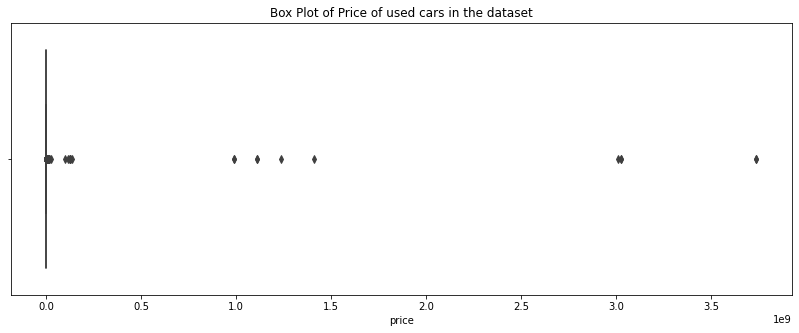

In [695]:
#box plot of 'price' to visualize outliers
plt.figure(figsize=(14,5))
sns.boxplot(data=df1,x='price').set(title="Box Plot of Price of used cars in the dataset")

C:\Users\Ludo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


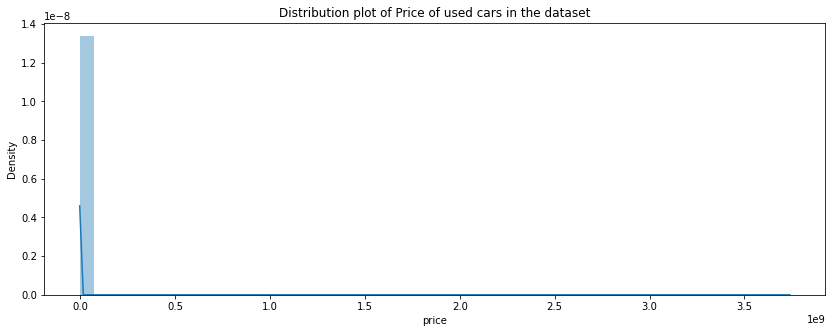

In [696]:
#Distribution plot of the price feature
plt.figure(figsize=(14,5))
sns.distplot(df1['price']).set(title = 'Distribution plot of Price of used cars in the dataset')
plt.show()

In [697]:
# Maximum, Minimum, Std dev and Mean value of price in the dataframe df1
print('Max:', df1['price'].max())
print('Min:', df1['price'].min())
print('Mean:', df1['price'].mean())
print('Std. Dev.:', df1['price'].std())

Max: 3736928711
Min: 0
Mean: 75199.0331873126
Std. Dev.: 12182282.173603749


##### We can observe from the figures above that the distribution of price is not consistent and outliers or errors in recording such data should be eliminated.

##### We will begin by removing any vehicle sold above 1 000 000 and below 100 to help when we perform an outlier test using z-score/std. dev. approach

In [698]:
#Eliminate outliers above 1 000 000 and below 100
df_price_out1 = df1[(df1['price'] < 1000000) & (df1['price'] > 100)]

C:\Users\Ludo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


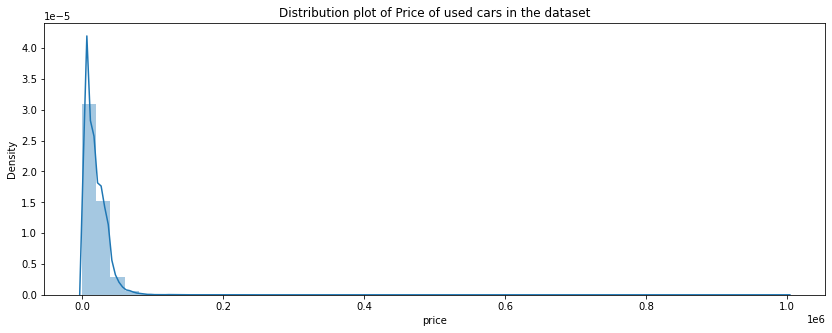

In [699]:
#Distribution plot of the price feature after removing very high outliers
plt.figure(figsize=(14,5))
sns.distplot(df_price_out1['price']).set(title = 'Distribution plot of Price of used cars in the dataset')
plt.show()

##### To be more consistent in the approach to remove outliers, I will use a threshold of 3x larger than the standard deviation. Hence, we will eliminate data with a Z score above 3. This approach may require more than one iteration since the mean will vary as outliers are eliminated.

#### Iteration 1: Price outliers

In [700]:
# Maximum, Minimum, Std dev and Mean value of price in the dataframe df_price_out1
print('Max:', df_price_out1['price'].max())
print('Min:', df_price_out1['price'].min())
print('Mean:', df_price_out1['price'].mean())
print('Std. Dev.:', df_price_out1['price'].std())

Max: 999999
Min: 101
Mean: 19085.296549198192
Std. Dev.: 15716.472154285577


In [701]:
#Upper and lower bounds for outliers
print("Highest allowed",df_price_out1['price'].mean() + 3*df_price_out1['price'].std())
print("Lowest allowed",df_price_out1['price'].mean() - 3*df_price_out1['price'].std())

Highest allowed 66234.71301205493
Lowest allowed -28064.11991365854


In [702]:
#Drop any observation outside of 3x std. dev. 
df_price_out2 = df_price_out1[(df_price_out1['price'] < 66234.71301205493) & (df_price_out1['price'] > -28064.11991365854)]


C:\Users\Ludo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


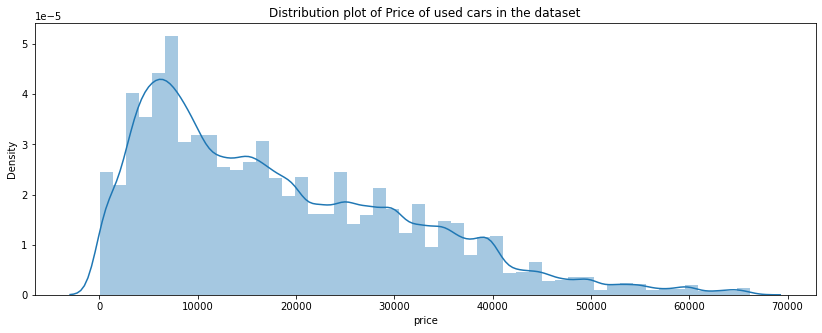

In [703]:
#Distribution plot of the price feature after the first iteration of outliers elimination
plt.figure(figsize=(14,5))
sns.distplot(df_price_out2['price']).set(title = 'Distribution plot of Price of used cars in the dataset')
plt.show()

##### We can see that taking this approach yields a much better distribution. Looking at the figure above, I will perform another iteration of the approach in hopes to shrink the tail of the distribution.

#### Second Iteration 

In [704]:
# Maximum, Minimum, Std dev and Mean value of price in the dataframe df_price_out2
print('Max:', df_price_out2['price'].max())
print('Min:', df_price_out2['price'].min())
print('Mean:', df_price_out2['price'].mean())
print('Std. Dev.:', df_price_out2['price'].std())

Max: 66199
Min: 101
Mean: 18321.505730870547
Std. Dev.: 13351.826427911083


In [705]:
#Upper and lower bounds for outliers
print("Highest allowed",df_price_out2['price'].mean() + 3*df_price_out2['price'].std())
print("Lowest allowed",df_price_out2['price'].mean() - 3*df_price_out2['price'].std())

Highest allowed 58376.98501460379
Lowest allowed -21733.973552862702


In [706]:
#Drop any observation outside of 3x std. dev.
df_price_out3 = df_price_out2[(df_price_out2['price'] < 58376.98501460379) & (df_price_out2['price'] > -21733.973552862702)]

C:\Users\Ludo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


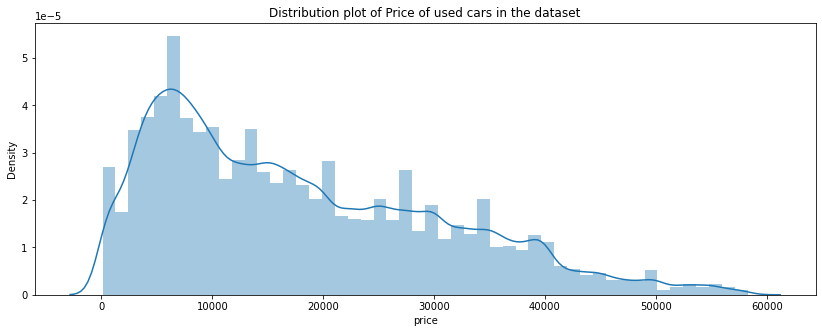

In [707]:
#Distribution plot of the price feature
plt.figure(figsize=(14,5))
sns.distplot(df_price_out3['price']).set(title = 'Distribution plot of Price of used cars in the dataset')
plt.show()

[Text(0.5, 1.0, 'Box Plot of Price of used cars in the dataset after eliminating outliers')]

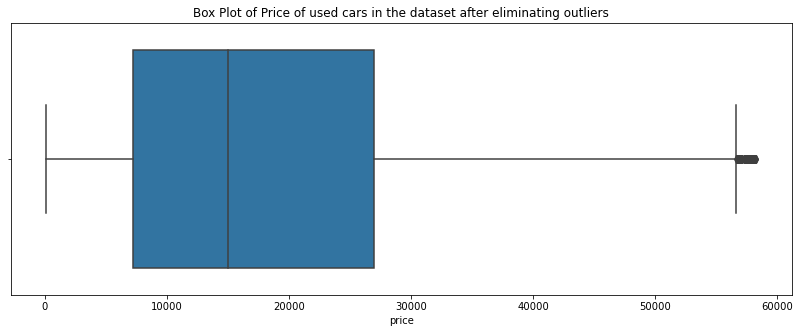

In [708]:
#box plot of 'price' after outlier elimination
plt.figure(figsize=(14,5))
sns.boxplot(data=df_price_out3,x='price').set(title="Box Plot of Price of used cars in the dataset after eliminating outliers")

##### Using the figure and Boxplot, we can see that the bulk of outliers have been eliminated. Although the distribution is not Normal, further iterations of this approach will yield marginal gains. Furthermore, the distribution looks a lot better and will be standardized during the regression process. We will stop there for 'price' outliers.

In [709]:
#How many observations do we have
df_price_out3.shape

(382708, 14)

### b. Year Outliers

##### Now we will take a similar approach from the Year feature

[Text(0.5, 1.0, 'Box Plot of Year of used cars in the dataset')]

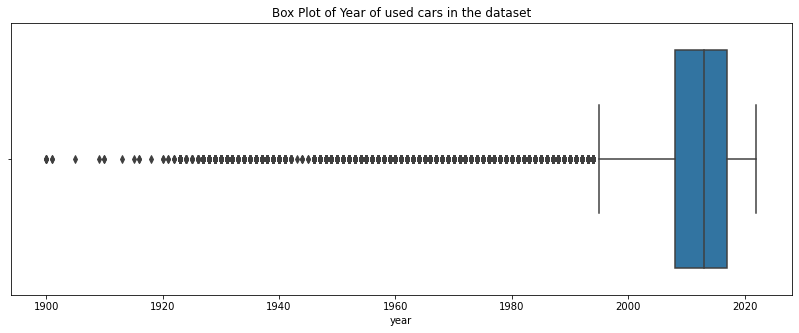

In [710]:
#box plot of 'year' to visualize outliers
plt.figure(figsize=(14,5))
sns.boxplot(data=df_price_out3,x='year').set(title="Box Plot of Year of used cars in the dataset")

C:\Users\Ludo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


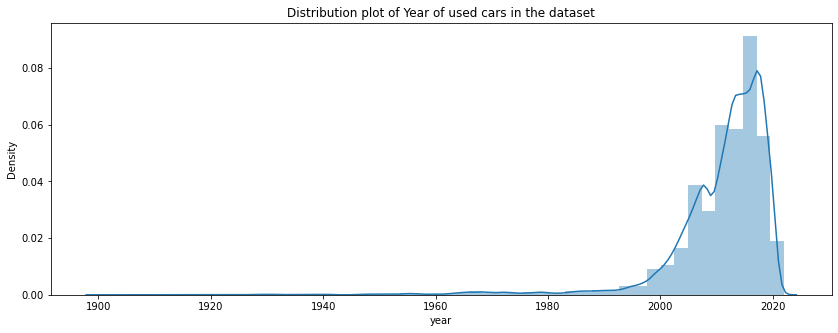

In [711]:
#Distribution plot of the year feature
plt.figure(figsize=(14,5))
sns.distplot(df_price_out3['year']).set(title = 'Distribution plot of Year of used cars in the dataset')
plt.show()

##### We can observe from the figures above that the distribution of price is not consistent and outliers or errors in recording such data should be eliminated. We will take a similar approach as above to do so.

In [712]:
# Maximum, Minimum, Std dev and Mean value of year in the dataframe df1
print('Max:', df_price_out3['year'].max())
print('Min:', df_price_out3['year'].min())
print('Mean:', df_price_out3['year'].mean())
print('Std. Dev.:', df_price_out3['year'].std())

Max: 2022.0
Min: 1900.0
Mean: 2010.943191344441
Std. Dev.: 9.485539864409825


In [713]:
#Upper and lower bounds for outliers
print("Highest allowed",df_price_out3['year'].mean() + 3*df_price_out3['year'].std())
print("Lowest allowed",df_price_out3['year'].mean() - 3*df_price_out3['year'].std())

Highest allowed 2039.3998109376705
Lowest allowed 1982.4865717512114


In [714]:
#Drop any observation outside of 3x std. dev. 
df_year_out1 = df_price_out3[(df_price_out3['year'] < 2039.3998109376705) & (df_price_out3['year'] > 1982.4865717512114)]

C:\Users\Ludo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


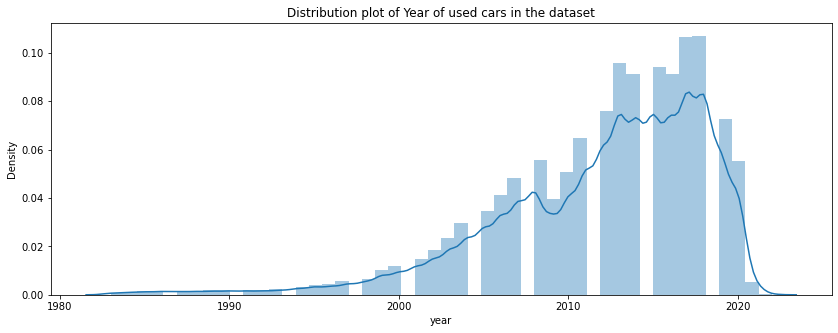

In [715]:
#Distribution plot of the year feature
plt.figure(figsize=(14,5))
sns.distplot(df_year_out1['year']).set(title = 'Distribution plot of Year of used cars in the dataset')
plt.show()

##### We can see that taking this approach yields a much better distribution. Looking at the figure above, I will perform another iteration of the approach in hopes to shrink the tail of the distribution.

#### Second Iteration 

In [716]:
# Maximum, Minimum, Std dev and Mean value of year in the dataframe df1
print('Max:', df_year_out1['year'].max())
print('Min:', df_year_out1['year'].min())
print('Mean:', df_year_out1['year'].mean())
print('Std. Dev.:', df_year_out1['year'].std())

Max: 2022.0
Min: 1983.0
Mean: 2011.9760148490984
Std. Dev.: 6.258242912535269


In [717]:
#Upper and lower bounds for outliers
print("Highest allowed",df_year_out1['year'].mean() + 3*df_year_out1['year'].std())
print("Lowest allowed",df_year_out1['year'].mean() - 3*df_year_out1['year'].std())

Highest allowed 2030.7507435867042
Lowest allowed 1993.2012861114927


In [718]:
#Drop any observation outside of 3x std. dev. 
df_year_out2 = df_year_out1[(df_year_out1['year'] < 2030.7507435867042) & (df_year_out1['year'] > 1993.2012861114927)]

C:\Users\Ludo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


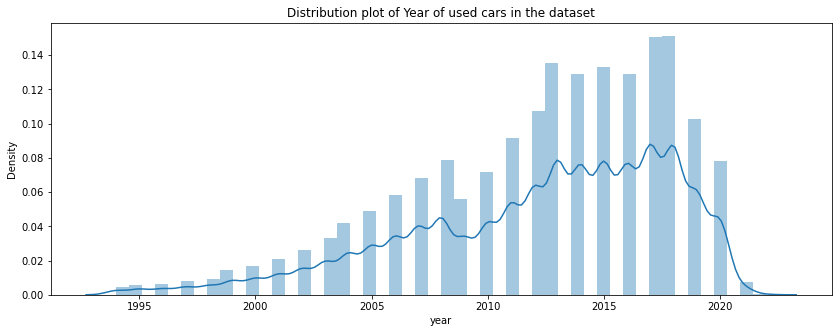

In [719]:
#Distribution plot of the year feature
plt.figure(figsize=(14,5))
sns.distplot(df_year_out2['year']).set(title = 'Distribution plot of Year of used cars in the dataset')
plt.show()

[Text(0.5, 1.0, 'Box Plot of Year of used cars in the dataset after eliminating outliers')]

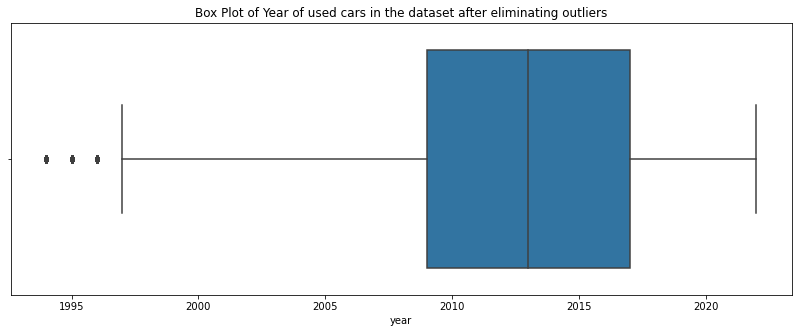

In [720]:
#box plot of 'Year' after outlier elimination
plt.figure(figsize=(14,5))
sns.boxplot(data=df_year_out2,x='year').set(title="Box Plot of Year of used cars in the dataset after eliminating outliers")

##### Using the figure and Boxplot, we can see that the bulk of outliers have been eliminated. Although the distribution is not Normal, further iterations of this approach will yield marginal gains. Furthermore, the distribution looks a lot better and will be standardized during the regression process. We will stop there for 'year' outliers.

In [721]:
#How many observations do we have
df_year_out2.shape

(367753, 14)

### c. Odometer Outlier

[Text(0.5, 1.0, 'Box Plot of odometer of used cars in the dataset')]

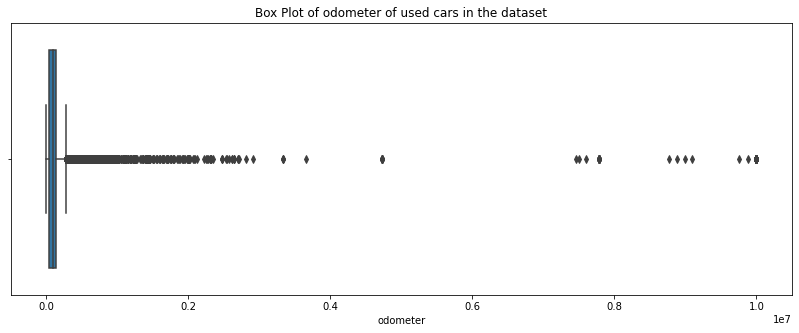

In [722]:
#box plot of 'odometer' to visualize outliers
plt.figure(figsize=(14,5))
sns.boxplot(data=df_year_out2,x='odometer').set(title="Box Plot of odometer of used cars in the dataset")

C:\Users\Ludo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


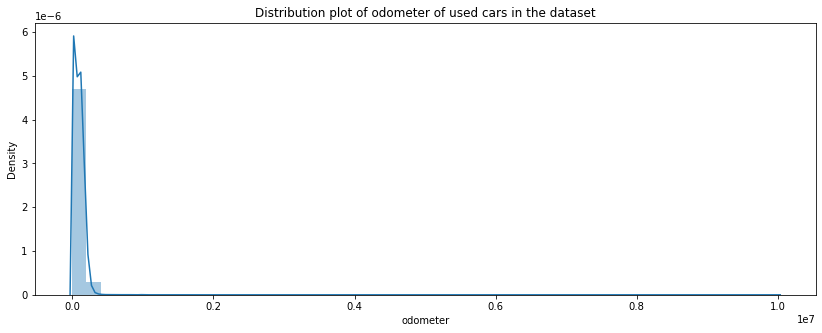

In [723]:
#Distribution plot of the odometer feature
plt.figure(figsize=(14,5))
sns.distplot(df_year_out2['odometer']).set(title = 'Distribution plot of odometer of used cars in the dataset')
plt.show()

##### We will remove all observations above 500 000km since this is usually the maximum lifespan of an engine

In [724]:
#Drop any observation outside of 500 000km 
df_odom_out1 = df_year_out2[(df_year_out2['odometer'] < 500000)]

#### Iteration 1: Odometer outliers

In [725]:
# Maximum, Minimum, Std dev and Mean value of odometer in the dataframe df1
print('Max:', df_odom_out1['odometer'].max())
print('Min:', df_odom_out1['odometer'].min())
print('Mean:', df_odom_out1['odometer'].mean())
print('Std. Dev.:', df_odom_out1['odometer'].std())

Max: 499232.0
Min: 0.0
Mean: 94257.75668585526
Std. Dev.: 63658.628778431244


In [726]:
#Upper and lower bounds for outliers
print("Highest allowed",df_odom_out1['odometer'].mean() + 3*df_odom_out1['odometer'].std())
print("Lowest allowed",df_odom_out1['odometer'].mean() - 3*df_odom_out1['odometer'].std())

Highest allowed 285233.643021149
Lowest allowed -96718.12964943847


In [727]:
#Drop any observation outside of 3x std. dev. 
df_odom_out2 = df_year_out2[(df_year_out2['odometer'] < 285233.643021149) & (df_year_out2['odometer'] > -96718.12964943847)]

C:\Users\Ludo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


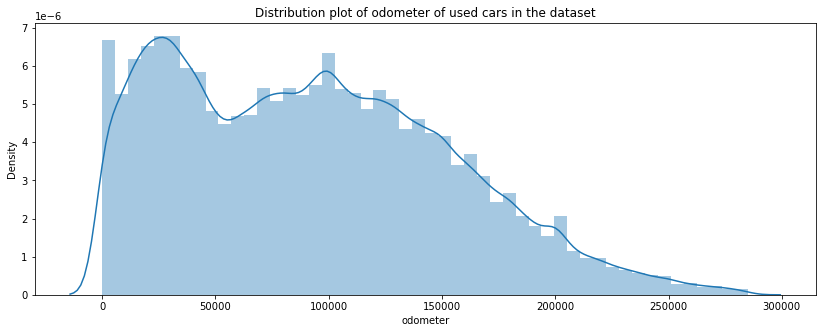

In [728]:
#Distribution plot of the odometer feature
plt.figure(figsize=(14,5))
sns.distplot(df_odom_out2['odometer']).set(title = 'Distribution plot of odometer of used cars in the dataset')
plt.show()

[Text(0.5, 1.0, 'Box Plot of odometer of used cars in the dataset')]

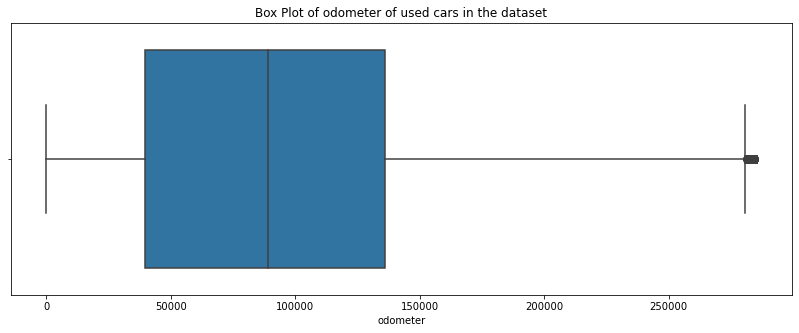

In [729]:
#box plot of 'year' to visualize outliers
plt.figure(figsize=(14,5))
sns.boxplot(data=df_odom_out2,x='odometer').set(title="Box Plot of odometer of used cars in the dataset")

##### Using the figure and Boxplot, we can see that the bulk of outliers have been eliminated. Although the distribution is not Normal, further iterations of this approach will yield marginal gains. Furthermore, the distribution looks a lot better and will be standardized during the regression process. We will stop there for 'odometer' outliers.

In [730]:
#How many observations do we have
df_odom_out2.shape

(362610, 14)

In [731]:
#Rename final dataframe to something more meaningful
df_outl_clean = df_odom_out2

### Addressing NaN values

In [732]:
# Reminder of NaN percentage in the current dataset
df_outl_clean.isna().sum()/df_outl_clean.shape[0]*100

region           0.000000
price            0.000000
year             0.000000
manufacturer     3.039354
condition       38.046937
cylinders       40.889661
fuel             0.573067
odometer         0.000000
title_status     1.924933
transmission     0.394363
drive           30.411461
type            20.731364
paint_color     29.263396
state            0.000000
dtype: float64

In [733]:
df_outl_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362610 entries, 27 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        362610 non-null  object 
 1   price         362610 non-null  int64  
 2   year          362610 non-null  float64
 3   manufacturer  351589 non-null  object 
 4   condition     224648 non-null  object 
 5   cylinders     214340 non-null  object 
 6   fuel          360532 non-null  object 
 7   odometer      362610 non-null  float64
 8   title_status  355630 non-null  object 
 9   transmission  361180 non-null  object 
 10  drive         252335 non-null  object 
 11  type          287436 non-null  object 
 12  paint_color   256498 non-null  object 
 13  state         362610 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 41.5+ MB


##### The missing data is located in categorical variables. As I sampled the data, I did not find indication of persistent errors in the sampling of the missing data. For this reason, the missing data is random and we can impute the value for these variables. I will include a KNNImputer for integer missing variables if there are any. Any feature with more than 5% of data missing will be labelled as 'missing' data. This will create a new category when it will come to label encoding. Additionally, data with less than 5% of missing data will be imputed the mode of their class.

### Impute Value of NaN

In [734]:
#create a copy of the dataframe
df_impute = df_outl_clean

In [539]:
# Preview the dataset
df_impute

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
27,auburn,33590,2014.0,gmc,good,8 cylinders,gas,57923.0,clean,other,NaN,pickup,white,al
28,auburn,22590,2010.0,chevrolet,good,8 cylinders,gas,71229.0,clean,other,NaN,pickup,blue,al
29,auburn,39590,2020.0,chevrolet,good,8 cylinders,gas,19160.0,clean,other,NaN,pickup,red,al
30,auburn,30990,2017.0,toyota,good,8 cylinders,gas,41124.0,clean,other,NaN,pickup,red,al
31,auburn,15000,2013.0,ford,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019.0,nissan,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,NaN,wy
426876,wyoming,30590,2020.0,volvo,good,NaN,gas,12029.0,clean,other,fwd,sedan,red,wy
426877,wyoming,34990,2020.0,cadillac,good,NaN,diesel,4174.0,clean,other,NaN,hatchback,white,wy
426878,wyoming,28990,2018.0,lexus,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,silver,wy


In [735]:
#Create a dictionary for the null values according to their percentage
print('Null Value Dictionary:\n')
null_dict = {}
for icol in df_outl_clean.columns.values:
    null_dict[icol] = ((df_outl_clean[icol].isna().sum())/df_outl_clean.shape[0])*100    
print(null_dict)

# sorting the null dictionary based on value
print('\n----------------------\n')
print('Null Value Percentage Dictionary:\n')
sorted_nulldict = {}
sorted_keys = sorted(null_dict, key = null_dict.get)  # [1, 3, 2]

for w in sorted_keys:
    sorted_nulldict[w] = null_dict[w]
print(sorted_nulldict)

Null Value Dictionary:

{'region': 0.0, 'price': 0.0, 'year': 0.0, 'manufacturer': 3.039353575466755, 'condition': 38.04693748104024, 'cylinders': 40.88966106836546, 'fuel': 0.5730674829706848, 'odometer': 0.0, 'title_status': 1.924933123741761, 'transmission': 0.3943630898210198, 'drive': 30.41146134965941, 'type': 20.731364275668074, 'paint_color': 29.263395935026615, 'state': 0.0}

----------------------

Null Value Percentage Dictionary:

{'region': 0.0, 'price': 0.0, 'year': 0.0, 'odometer': 0.0, 'state': 0.0, 'transmission': 0.3943630898210198, 'fuel': 0.5730674829706848, 'title_status': 1.924933123741761, 'manufacturer': 3.039353575466755, 'type': 20.731364275668074, 'paint_color': 29.263395935026615, 'drive': 30.41146134965941, 'condition': 38.04693748104024, 'cylinders': 40.88966106836546}


In [736]:
#Identify which are categorical variables since KNNImputer cannot be performed on strings
cat_variables = df_impute[['region', 'manufacturer', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive',
                          'type', 'paint_color', 'state']]

In [737]:
#Import KNNImputer
from sklearn.impute import KNNImputer


#Create the loop aiming to impute value using knnimputer for integer and the mode for categorical variables that are missing
#less than 5% of their data
imputer = KNNImputer(n_neighbors=5, weights="uniform")
for key in sorted_nulldict:
    if key in ['year','odometer']:
        continue
    if sorted_nulldict[key] > 0 and sorted_nulldict[key]<5:
        if key in cat_variables:
            df_impute[key] = df_impute[key].fillna(df_impute[key].mode().iloc[0])
        else:
            df_impute[key] = imputer.fit_transform(df_impute[key])    

C:\Users\Ludo\AppData\Local\Temp\ipykernel_27728\2918832931.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_impute[key] = df_impute[key].fillna(df_impute[key].mode().iloc[0])
C:\Users\Ludo\AppData\Local\Temp\ipykernel_27728\2918832931.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_impute[key] = df_impute[key].fillna(df_impute[key].mode().iloc[0])
C:\Users\Ludo\AppData\Local\Temp\ipykernel_27728\2918832931.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [738]:
# Label NaN values as missing for features with more than 5% NaN values.

for key in sorted_nulldict:
    if key in ['VIN','size']:
        continue    
    if sorted_nulldict[key]>5 and key in cat_variables:
        df_impute[key] = df_impute[key].fillna('missing')

C:\Users\Ludo\AppData\Local\Temp\ipykernel_27728\2001261332.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_impute[key] = df_impute[key].fillna('missing')


In [739]:
#Confirm the operations worked
df_impute.head()

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
27,auburn,33590,2014.0,gmc,good,8 cylinders,gas,57923.0,clean,other,missing,pickup,white,al
28,auburn,22590,2010.0,chevrolet,good,8 cylinders,gas,71229.0,clean,other,missing,pickup,blue,al
29,auburn,39590,2020.0,chevrolet,good,8 cylinders,gas,19160.0,clean,other,missing,pickup,red,al
30,auburn,30990,2017.0,toyota,good,8 cylinders,gas,41124.0,clean,other,missing,pickup,red,al
31,auburn,15000,2013.0,ford,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al


In [740]:
#Confirm there are no more NaN
df_impute.isna().sum()/df_impute.shape[0]*100

region          0.0
price           0.0
year            0.0
manufacturer    0.0
condition       0.0
cylinders       0.0
fuel            0.0
odometer        0.0
title_status    0.0
transmission    0.0
drive           0.0
type            0.0
paint_color     0.0
state           0.0
dtype: float64

### LabelEncoding

In [742]:
#Create a copy of the imputed dataset
df_encode = df_impute.copy()

In [743]:
#Import the preprocessing package to us LabelEncoder
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
#Create a look encoding each feature and printing the legend of each encription
for i in cat_variables:
    df_encode[i] = le.fit_transform(df_impute[i])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(le_name_mapping)
    print('\n-----------\n')

{'SF bay area': 0, 'abilene': 1, 'akron / canton': 2, 'albany': 3, 'albuquerque': 4, 'altoona-johnstown': 5, 'amarillo': 6, 'ames': 7, 'anchorage / mat-su': 8, 'ann arbor': 9, 'annapolis': 10, 'appleton-oshkosh-FDL': 11, 'asheville': 12, 'ashtabula': 13, 'athens': 14, 'atlanta': 15, 'auburn': 16, 'augusta': 17, 'austin': 18, 'bakersfield': 19, 'baltimore': 20, 'baton rouge': 21, 'battle creek': 22, 'beaumont / port arthur': 23, 'bellingham': 24, 'bemidji': 25, 'bend': 26, 'billings': 27, 'binghamton': 28, 'birmingham': 29, 'bismarck': 30, 'bloomington': 31, 'bloomington-normal': 32, 'boise': 33, 'boone': 34, 'boston': 35, 'boulder': 36, 'bowling green': 37, 'bozeman': 38, 'brainerd': 39, 'brownsville': 40, 'brunswick': 41, 'buffalo': 42, 'butte': 43, 'cape cod / islands': 44, 'catskills': 45, 'cedar rapids': 46, 'central NJ': 47, 'central louisiana': 48, 'central michigan': 49, 'champaign urbana': 50, 'charleston': 51, 'charlotte': 52, 'charlottesville': 53, 'chattanooga': 54, 'chautau

{'clean': 0, 'lien': 1, 'missing': 2, 'parts only': 3, 'rebuilt': 4, 'salvage': 5}

-----------

{'automatic': 0, 'manual': 1, 'other': 2}

-----------

{'4wd': 0, 'fwd': 1, 'missing': 2, 'rwd': 3}

-----------

{'SUV': 0, 'bus': 1, 'convertible': 2, 'coupe': 3, 'hatchback': 4, 'mini-van': 5, 'missing': 6, 'offroad': 7, 'other': 8, 'pickup': 9, 'sedan': 10, 'truck': 11, 'van': 12, 'wagon': 13}

-----------

{'black': 0, 'blue': 1, 'brown': 2, 'custom': 3, 'green': 4, 'grey': 5, 'missing': 6, 'orange': 7, 'purple': 8, 'red': 9, 'silver': 10, 'white': 11, 'yellow': 12}

-----------

{'ak': 0, 'al': 1, 'ar': 2, 'az': 3, 'ca': 4, 'co': 5, 'ct': 6, 'dc': 7, 'de': 8, 'fl': 9, 'ga': 10, 'hi': 11, 'ia': 12, 'id': 13, 'il': 14, 'in': 15, 'ks': 16, 'ky': 17, 'la': 18, 'ma': 19, 'md': 20, 'me': 21, 'mi': 22, 'mn': 23, 'mo': 24, 'ms': 25, 'mt': 26, 'nc': 27, 'nd': 28, 'ne': 29, 'nh': 30, 'nj': 31, 'nm': 32, 'nv': 33, 'ny': 34, 'oh': 35, 'ok': 36, 'or': 37, 'pa': 38, 'ri': 39, 'sc': 40, 'sd': 41, '

In [744]:
df_encode

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
27,16,33590,2014.0,13,2,6,2,57923.0,0,2,2,9,11,1
28,16,22590,2010.0,7,2,6,2,71229.0,0,2,2,9,1,1
29,16,39590,2020.0,7,2,6,2,19160.0,0,2,2,9,9,1
30,16,30990,2017.0,38,2,6,2,41124.0,0,2,2,9,9,1
31,16,15000,2013.0,12,0,5,2,128000.0,0,0,3,11,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,397,23590,2019.0,30,2,5,2,32226.0,0,2,1,10,6,50
426876,397,30590,2020.0,40,2,7,2,12029.0,0,2,1,10,9,50
426877,397,34990,2020.0,6,2,7,0,4174.0,0,2,2,4,11,50
426878,397,28990,2018.0,22,2,5,2,30112.0,0,2,1,10,10,50


# Data Understanding Part 2

##### Now that we have converted our dataset into something more versatile, we will explore underlying trends. More interestingly, we will explore correlations and distribution of each feature.

In [745]:
#Create a copy of the encoded data
df_final = df_encode.copy()

C:\Users\Ludo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


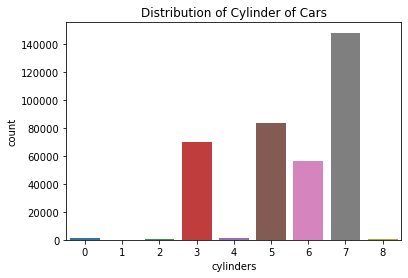

In [747]:
#Explore the distribution of car cylinders
fig = sns.countplot(df_final.cylinders)
fig.title.set_text("Distribution of Cylinder of Cars")

As we can see the distribution is skewed and we will need to address this by using the standardscaler when performing regression.

To be more efficient in my visual analysis, I will take random sample of my data to perform pairplot and observe potential correlations and distributions within the dataset

In [748]:
#First Sample for features of price, year, odometer, transmission and type
sample_cars = df_final[['price', 'year','odometer', 'transmission','type']]
sample_cars = sample_cars.sample(n = 10000, random_state =1)
sample_cars

,price,year,odometer,transmission,type
411443,12900,2011.0,121000.0,0,0
113427,10985,2015.0,38000.0,0,6
292946,27500,1999.0,734.0,0,8
97738,9700,2012.0,108000.0,0,6
407719,6200,2000.0,87000.0,1,8
...,...,...,...,...,...
232604,26500,2007.0,32000.0,0,0
252960,16990,2018.0,24963.0,2,13
34919,18500,2002.0,67000.0,0,11
385750,5550,2013.0,155233.0,0,10


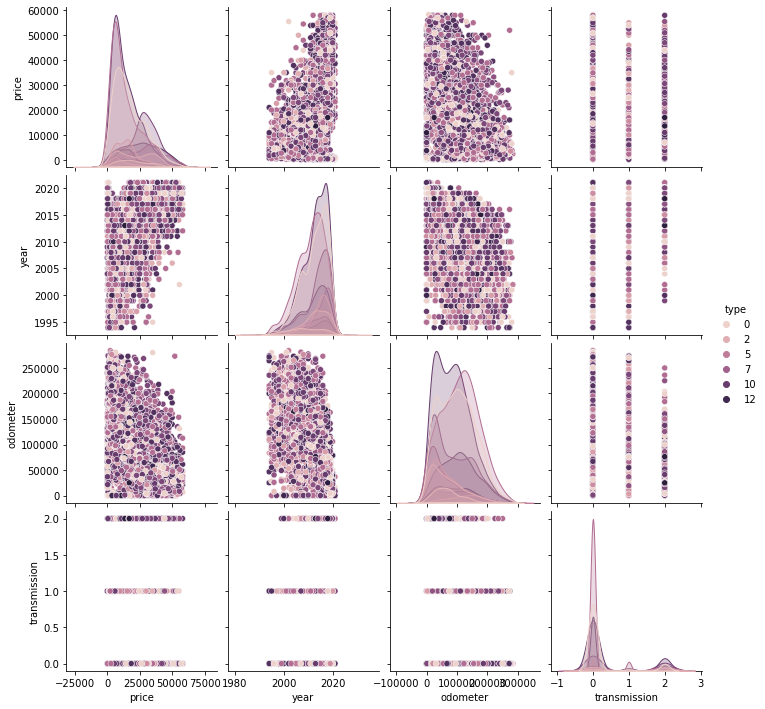

In [566]:
#Perform a pairplot
sns.pairplot(sample_cars, hue = 'type')

As we can see all distributions are skewed. Furthermore, we can observe a positive correlation between the price and the year. Similarly, there is a negative correlation between price and odometer and a slight negative correlation between odometer and year. In a business sense, these observations make sense as the vehicle wil lose value if it was driven too much or if it is too old. Additionally, older vehicles are more likely to have more accumulated km.

In [749]:
#Second Sample for features of 'price', 'manufacturer','cylinders', 'fuel','title_status','condition'
sample_cars2 = df_final[['price', 'manufacturer','cylinders', 'fuel','title_status','condition']]
sample_cars2 = sample_cars2.sample(n = 10000, random_state =1)
sample_cars2

,price,manufacturer,cylinders,fuel,title_status,condition
411443,12900,24,5,2,0,0
113427,10985,24,7,2,0,4
292946,27500,12,7,0,0,2
97738,9700,13,7,2,0,4
407719,6200,13,6,2,0,2
...,...,...,...,...,...,...
232604,26500,6,6,2,0,3
252960,16990,20,7,2,0,2
34919,18500,14,3,2,0,0
385750,5550,12,3,2,0,4


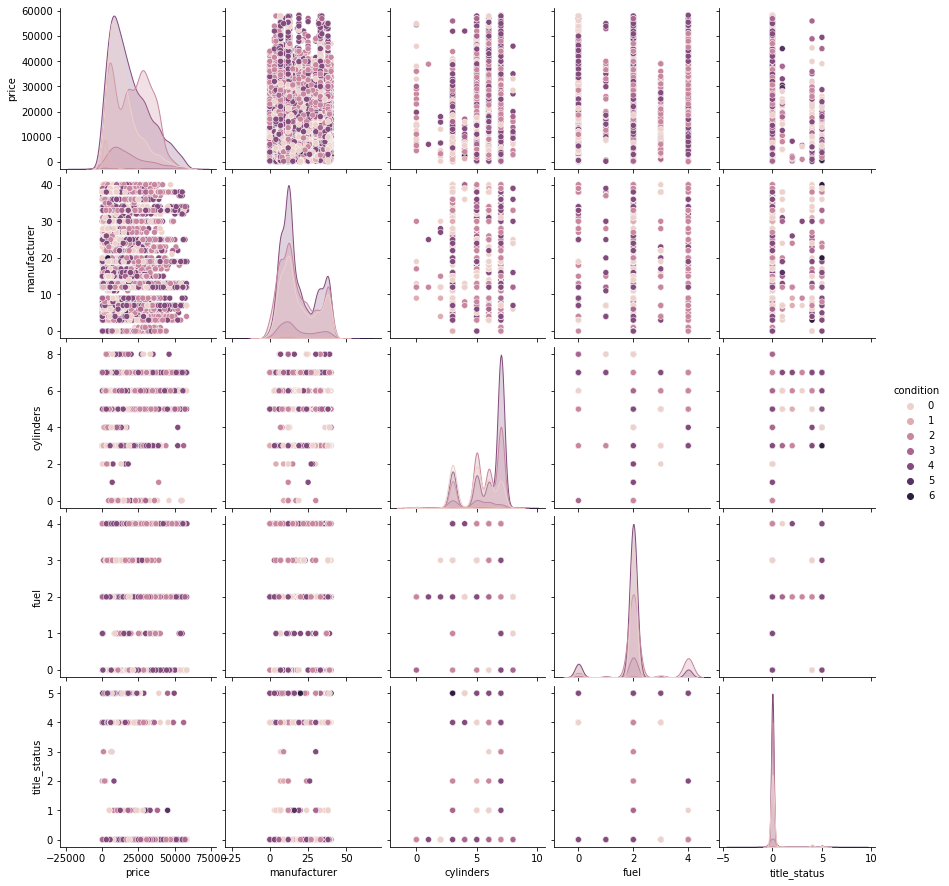

In [568]:
#Perform a pairplot
sns.pairplot(sample_cars2, hue = 'condition')

Here we can see that the fuel data is concentrated on one type of fuel. Other correlations across features are hard to interpret.

In [750]:
#Third Sample for features of 'price', 'region','drive', 'paint_color','state'
sample_cars3 = df_final[['price', 'region','drive', 'paint_color','state']]
sample_cars3 = sample_cars3.sample(n = 10000, random_state =1)
sample_cars3

,price,region,drive,paint_color,state
411443,12900,383,0,10,47
113427,10985,324,2,6,9
292946,27500,61,2,4,35
97738,9700,140,2,6,9
407719,6200,312,2,6,47
...,...,...,...,...,...
232604,26500,52,2,11,27
252960,16990,160,1,10,31
34919,18500,197,2,0,4
385750,5550,252,1,0,44


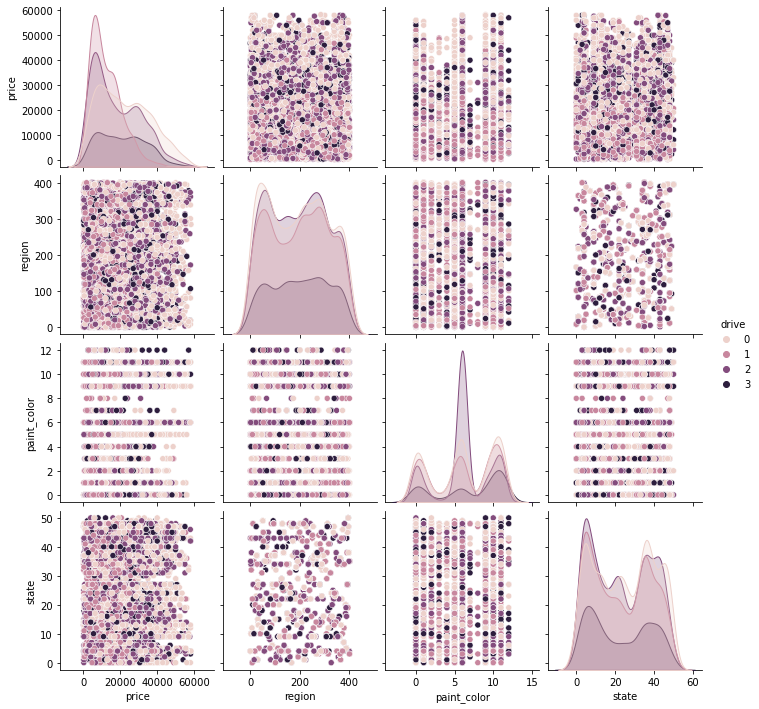

In [570]:
#Perform a pairplot
sns.pairplot(sample_cars3, hue = 'drive')

Once again, it is hard to see any correlation across this dataset.

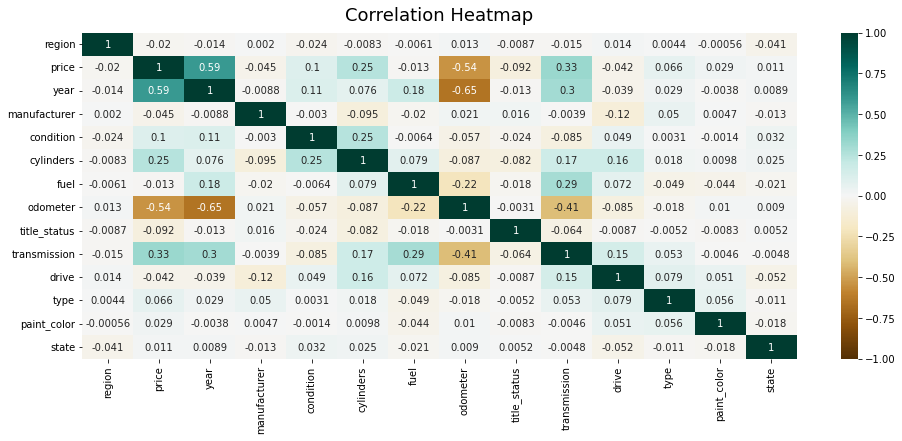

In [751]:
#Create a correlation Heatmap
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_final.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

As expected, the highest correlation involves year, odometer & price.  

Furthermore, interestingly, transmission seems to provide a premium to the price of used vehicles. In a puzzling way, there seems to be a negative correlation between transmission and odometer?

## Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

To begin my analysis, I wanted to perform a linear regression, polynomial of degree 2,polynomial of degree 3 and polynomial of degree 4. Afterwards, I expect the computational requirements to become too large.  

I will use these first few models to decide which models to perform later on.  

To decide on the best model, I will review the MSE, MAE and Score/r^2 of each model. Furthermore, I will weight in the computational cost of imposing a higher degree polynomial and if it will continue to be feasable as I explore more complex regression models

### Regression

In [602]:
# split the data into training data and develoment data using 

X = df_final.drop(columns = ['price'])
y = df_final['price']
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, shuffle=True)

In [603]:
X_train

,region,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
319311,211,2014.0,19,4,7,2,119487.0,0,0,2,6,6,37
131775,33,2015.0,13,4,7,2,141075.0,0,0,0,0,11,13
251412,47,2008.0,17,0,6,2,162825.0,0,0,0,0,6,31
181769,20,2020.0,0,4,7,2,22500.0,0,0,0,0,6,20
25824,119,2012.0,13,2,5,2,58480.0,0,0,1,0,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142521,56,2010.0,12,4,7,2,150000.0,0,0,2,6,6,14
302803,360,2020.0,0,2,5,2,2835.0,0,2,2,0,9,35
155963,46,2004.0,8,0,5,2,47000.0,0,0,3,3,0,12
172955,198,2000.0,25,2,6,2,202000.0,0,0,1,3,10,17


### Linear Regression

In [671]:
#Building a pipeline for the linear regression

Linear_pipe =  Pipeline([('scaler', StandardScaler()),
                     ('linear', LinearRegression())])


#Perform Linear regression on the data

Linear_pipe.fit(X_train, y_train)
train_predict=Linear_pipe.predict(X_train)
test_predict=Linear_pipe.predict(X_test)


#Regression Error
Linear_train_mse = mean_squared_error(train_predict, y_train)
Linear_test_mse = mean_squared_error(test_predict, y_test)
Linear_train_mae = mean_absolute_error(train_predict, y_train)
Linear_test_mae = mean_absolute_error(test_predict, y_test)



#Check
linear_coefs = Linear_pipe.named_steps['linear'].coef_
print(Linear_pipe)
print(linear_coefs)  

print(f"Linear Model: train_mse={Linear_train_mse}, test_mse={Linear_test_mse}")
print(f"Linear Model: train_mae={Linear_train_mae}, test_mae={Linear_test_mae}")
print(Linear_pipe.score(X_test, y_test))

Pipeline(steps=[('scaler', StandardScaler()), ('linear', LinearRegression())])
[  -96.56228047  5076.81733868  -439.22849608   104.25761581
  2443.70626629 -2379.12140244 -3266.16550484  -843.99297239
  1675.19978504 -1216.01141602   474.67943402   346.06480216
   -32.92865679]
Linear Model: train_mse=84300596.4002584, test_mse=83664386.27190667
Linear Model: train_mae=6959.137085982186, test_mae=6942.932764106856
0.4860748410966401


### Polynomial Regression degree 2

In [670]:
#Building a pipeline for the polynomial regression

Poly2_pipe =  Pipeline([('scaler', StandardScaler()),
                     ('feature_transform', PolynomialFeatures(degree=2, include_bias=False)),
                       ('linear', LinearRegression())])


#Perform polynomial regression on the data

Poly2_pipe.fit(X_train, y_train)
train_predict=Poly2_pipe.predict(X_train)
test_predict=Poly2_pipe.predict(X_test)


#Regression Error
Poly2_train_mse = mean_squared_error(train_predict, y_train)
Poly2_test_mse = mean_squared_error(test_predict, y_test)
Poly2_train_mae = mean_absolute_error(train_predict, y_train)
Poly2_test_mae = mean_absolute_error(test_predict, y_test)



#Check
Poly2_coefs = Poly2_pipe.named_steps['linear'].coef_
print(Poly2_pipe)
print(Poly2_coefs)  

print(f"Polynomial Degree 2 Model: train_mse={Poly2_train_mse}, test_mse={Poly2_test_mse}")
print(f"Polynomial Degree 2 Model: train_mae={Poly2_train_mae}, test_mae={Poly2_test_mae}")
print(Poly2_pipe.score(X_test, y_test))

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_transform', PolynomialFeatures(include_bias=False)),
                ('linear', LinearRegression())])
[-6.30666806e+01  6.52896378e+03 -3.68840422e+02  3.28806849e+02
  8.23542699e+02 -1.57746988e+03 -3.04155181e+03 -7.31998906e+02
 -4.05079468e+02 -1.60947990e+03 -2.32923539e+01  3.31814359e+02
 -1.22734952e+02  1.02893599e+02 -5.84053005e+01 -6.59151717e+01
  2.79624380e+01  4.21915829e+01  1.18294126e+02 -4.49414138e+00
 -4.69671380e+01 -1.22650023e+01  1.23337675e+01 -2.09761739e+01
  1.51198146e+01  5.67196994e+01  1.44698315e+03 -2.19384838e+02
  2.03102624e+01  7.34664444e+02 -7.42444999e+02 -1.79917111e+02
 -2.07953556e+02 -6.31897813e+02 -2.30121442e+02  1.66954835e+02
 -4.75363853e+01  1.91384719e+02  4.50962828e+02 -1.54039297e+01
  2.14317531e+01  3.98762781e+01  2.75917734e+02  1.90281251e+01
 -1.66335725e+01 -5.08750726e+01 -1.44020551e+02  1.19437456e+01
  4.23645005e+01  1.45550338e+01  2.49550304e+

### Polynomial Regression degree 3

In [669]:
#Building a pipeline for the polynomial regression

Poly3_pipe =  Pipeline([('scaler', StandardScaler()),
                     ('feature_transform', PolynomialFeatures(degree=3, include_bias=False)),
                       ('linear', LinearRegression())])


#Perform polynomial regression on the data

Poly3_pipe.fit(X_train, y_train)
train_predict=Poly3_pipe.predict(X_train)
test_predict=Poly3_pipe.predict(X_test)


#Regression Error
Poly3_train_mse = mean_squared_error(train_predict, y_train)
Poly3_test_mse = mean_squared_error(test_predict, y_test)
Poly3_train_mae = mean_absolute_error(train_predict, y_train)
Poly3_test_mae = mean_absolute_error(test_predict, y_test)



#Check
Poly3_coefs = Poly3_pipe.named_steps['linear'].coef_
print(Poly3_pipe)
print(Poly3_coefs)  

print(f"Polynomial Degree 3 Model: train_mse={Poly3_train_mse}, test_mse={Poly3_test_mse}")
print(f"Polynomial Degree 3 Model: train_mae={Poly3_train_mae}, test_mae={Poly3_test_mae}")
print(Poly3_pipe.score(X_test, y_test))

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_transform',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('linear', LinearRegression())])
[-5.44196715e+01  5.97022751e+03 -5.46625067e+02  1.19645669e+03
  4.63190604e+02 -3.56783882e+02 -3.81250541e+03  3.75472271e+02
  2.44000763e+10  2.24474927e+03  3.33759763e+02 -2.89212017e+02
  3.02776287e+01  4.91809423e+01 -1.60229692e+02 -4.21396155e+01
  3.46493068e+01  4.77135468e+00  1.17650396e+02 -4.40589783e+01
 -1.11688268e+02 -4.41274428e+00  1.78535860e+01 -2.78176775e+01
  9.35490894e+00  2.41751347e+01  1.15720893e+03 -4.97072773e+02
 -4.28189549e+01  7.69297697e+02 -5.68088268e+02 -7.46099959e+02
 -1.51460632e+02 -1.27764848e+03 -9.59939955e+02  3.17734665e+02
 -1.54142432e+02  1.38940270e+02  3.35165378e+02  4.80213546e+01
 -4.57829558e+02  1.68437986e+01  7.28250008e+01  2.64118209e+02
 -2.20717769e+02 -1.00056907e+02  4.52436884e+01 -2.89113696e+01
  2.97129122e+01 -4

0.6949648062722513


### Polynomial Regression degree 4

In [667]:
#Building a pipeline for the linear regression

Poly4_pipe =  Pipeline([('scaler', StandardScaler()),
                     ('feature_transform', PolynomialFeatures(degree=4, include_bias=False)),
                       ('linear', LinearRegression())])


#Perform polynomial regression on the data

Poly4_pipe.fit(X_train, y_train)
train_predict=Poly4_pipe.predict(X_train)
test_predict=Poly4_pipe.predict(X_test)


#Regression Error
Poly4_train_mse = mean_squared_error(train_predict, y_train)
Poly4_test_mse = mean_squared_error(test_predict, y_test)
Poly4_train_mae = mean_absolute_error(train_predict, y_train)
Poly4_test_mae = mean_absolute_error(test_predict, y_test)



#Check
Poly4_coefs = Poly4_pipe.named_steps['linear'].coef_
print(Poly4_pipe)
print(Poly4_coefs)  

print(f"Polynomial Degree 4 Model: train_mse={Poly4_train_mse}, test_mse={Poly4_test_mse}")
print(f"Polynomial Degree 4 Model: train_mae={Poly4_train_mae}, test_mae={Poly4_test_mae}")
print(Poly4_pipe.score(X_test, y_test))

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_transform',
                 PolynomialFeatures(degree=4, include_bias=False)),
                ('linear', LinearRegression())])
[-2.51270881e+13 -4.60634100e+11 -3.29089939e+10 ...  2.20549408e+02
 -6.40538950e+01  1.18788788e+02]
Polynomial Degree 4 Model: train_mse=44889131.99971875, test_mse=45256869.86364306
Polynomial Degree 4 Model: train_mae=4575.078599016701, test_mae=4588.397135305574
0.722000661541321


##### We stop at degree 4 because it is becoming extremely computationally expensive. If we look at the DELTA MAE for each increase in polynomial we can see that the gain in MAE is becoming less important as we increase the polynomial. Hence, a polynomial of degree 2 or 3 seem to be optimal.  

##### Furthermore, as we compile the score, MSE and MAE of each model, we can see that the polynomial of order 4 performed best. It was capable to explain 72% of the datasets variation with a mean absolute error of only 4588 dollars. The second best model is the 3 degree polynomial which was capable of capturing 69.5% of the variation in price. It had a MAE of 4880 dollars.  

##### Considering the computational cost of running the 4 degree polynomial, I will settle for my exploration on the 3 degree polynomial as the marginal gain in prediction do not warrant the length in runtime.

### Polynomial Regression degree 2 - LASSO

In [666]:
#We now try using lasso to offer a penalized regression method

Lasso2_pipe =  Pipeline([('scaler', StandardScaler()),
                     ('feature_transform', PolynomialFeatures(degree=2, include_bias=False)),
                       ('lasso', Lasso(random_state=42))])

#Perform polynomial regression on the data

Lasso2_pipe.fit(X_train, y_train)
train_predict=Lasso2_pipe.predict(X_train)
test_predict=Lasso2_pipe.predict(X_test)


#Regression Error
Lasso2_train_mse = mean_squared_error(train_predict, y_train)
Lasso2_test_mse = mean_squared_error(test_predict, y_test)
Lasso2_train_mae = mean_absolute_error(train_predict, y_train)
Lasso2_test_mae = mean_absolute_error(test_predict, y_test)



#Check
Lasso2_coefs = Lasso2_pipe.named_steps['lasso'].coef_
print(Lasso2_pipe)
print(Lasso2_coefs)  

print(f"Lasso Degree 2 Model: train_mse={Lasso2_train_mse}, test_mse={Lasso2_test_mse}")
print(f"Lasso Degree 2 Model: train_mae={Lasso2_train_mae}, test_mae={Lasso2_test_mae}")
print(Lasso2_pipe.score(X_test, y_test))

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_transform', PolynomialFeatures(include_bias=False)),
                ('lasso', Lasso(random_state=42))])
[-6.20266566e+01  6.53186518e+03 -3.66678244e+02  3.27514767e+02
  8.25002648e+02 -1.57671051e+03 -3.03781402e+03 -6.92045890e+02
 -3.63873101e+02 -1.60750844e+03 -2.08208744e+01  3.30155637e+02
 -1.21641808e+02  1.01757398e+02 -5.55777728e+01 -6.52122263e+01
  2.70425076e+01  4.16912422e+01  1.17127416e+02 -1.13947722e+00
 -4.59807885e+01 -1.03987539e+01  1.18190573e+01 -2.02383360e+01
  1.41138571e+01  5.56243684e+01  1.44585359e+03 -2.18970952e+02
  1.93522648e+01  7.31934820e+02 -7.41209112e+02 -1.77945065e+02
 -2.07441278e+02 -6.20783794e+02 -2.30260480e+02  1.63491348e+02
 -4.40778861e+01  1.88869263e+02  4.48575553e+02 -1.42173155e+01
  2.00088815e+01  3.88042341e+01  2.74913397e+02  1.80278664e+01
 -1.63423954e+01 -4.96828061e+01 -1.43261015e+02  1.08276110e+01
  4.12751186e+01  1.07892962e+01  2.4877496

Lasso for polynomial of degree 2 did not drastically increase the predictive value of the model.

### Polynomial Regression degree 3 - LASSO

In [753]:
#We now try using lasso to offer a penalized regression method

Lasso3_pipe =  Pipeline([('scaler', StandardScaler()),
                     ('feature_transform', PolynomialFeatures(degree=3, include_bias=False)),
                       ('lasso', Lasso(random_state=42))])

#Perform polynomial regression on the data

Lasso3_pipe =Lasso3_pipe.fit(X_train, y_train)
train_predict=Lasso3_pipe.predict(X_train)
test_predict=Lasso3_pipe.predict(X_test)


#Regression Error
Lasso3_train_mse = mean_squared_error(train_predict, y_train)
Lasso3_test_mse = mean_squared_error(test_predict, y_test)
Lasso3_train_mae = mean_absolute_error(train_predict, y_train)
Lasso3_test_mae = mean_absolute_error(test_predict, y_test)



#Check
Lasso3_coefs = Lasso3_pipe.named_steps['lasso'].coef_
print(Lasso3_pipe)
print(Lasso3_coefs)  

print(f"Lasso Degree 3 Model: train_mse={Lasso3_train_mse}, test_mse={Lasso3_test_mse}")
print(f"Lasso Degree 3 Model: train_mae={Lasso3_train_mae}, test_mae={Lasso3_test_mae}")
print(Lasso3_pipe.score(X_test, y_test))

C:\Users\Ludo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.620e+12, tolerance: 4.133e+09
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_transform',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('lasso', Lasso(random_state=42))])
[-1.52612179e+01  6.02488583e+03 -4.88233607e+02  1.13703761e+03
  4.87548595e+02 -1.48938647e+02 -3.73642226e+03 -0.00000000e+00
  2.88927199e+03  2.21042001e+03  3.10098018e+02 -2.13225758e+02
 -0.00000000e+00  4.92940492e+01 -1.51892960e+02 -4.08937505e+01
  2.94119846e+01  3.82731008e+00  1.14434002e+02 -3.85022349e+01
 -4.17543244e+01  1.58648815e-01  1.69949566e+01 -2.80209720e+01
  7.37666413e+00  2.32038794e+01  1.17120019e+03 -4.89117024e+02
 -2.65250570e+01  7.54622442e+02 -5.55100494e+02 -7.18814007e+02
 -8.05555309e+01 -1.19558419e+03 -9.46743613e+02  3.10429095e+02
 -1.45218110e+02  1.31872057e+02  3.36938296e+02  4.27948883e+01
 -4.54091408e+02  9.10778175e+00  7.41987275e+01  1.83621236e+02
 -1.59212842e+02 -9.91211838e+01  4.08050032e+01 -2.64252222e+01
  2.99108631e+01

0.6949691656074611


Lasso for polynomial of degree 3 did not drastically increase the predictive value of the model.

### Polynomial Regression degree 3 - Cross Validation

In [756]:
#Building a pipeline for the linear regression

Poly3_pipe =  Pipeline([('scaler', StandardScaler()),
                     ('feature_transform', PolynomialFeatures(degree=3, include_bias=False)),
                       ('linear', LinearRegression())])


#Perform polynomial regression on the data

Poly3 =Poly3_pipe.fit(X_train, y_train)

# Permutation importance
feature_importance_poly3 = {}
r = permutation_importance(Poly3, X_test, y_test , n_repeats=30,random_state=0)
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{X_test.columns[i]:<8}"
        f"  {r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")
        feature_importance_poly3[X_dev.columns[i]]=r.importances_mean[i]



year      0.444 +/- 0.002
odometer  0.150 +/- 0.001
drive     0.142 +/- 0.001
cylinders  0.125 +/- 0.001
fuel      0.112 +/- 0.001
transmission  0.030 +/- 0.001
type      0.019 +/- 0.000
condition  0.017 +/- 0.000
title_status  0.015 +/- 0.001
manufacturer  0.010 +/- 0.000
paint_color  0.010 +/- 0.000
state     0.004 +/- 0.000
region    0.001 +/- 0.000


In [643]:
Poly3.score(X_test, y_test)

0.6949648062722513

In [757]:
#create a feature importance DF
feature_importance_poly3 = pd.DataFrame(feature_importance_poly3,index=[0]).T
feature_importance_poly3 = feature_importance_poly3.rename(columns={0: "Feature Importance for Polynomial Degree 3"})
feature_importance_poly3

,Feature Importance for Polynomial Degree 3
year,0.444023
odometer,0.150310
drive,0.142160
cylinders,0.124878
fuel,0.112096
transmission,0.030493
type,0.018574
condition,0.016990
title_status,0.015454
manufacturer,0.010192


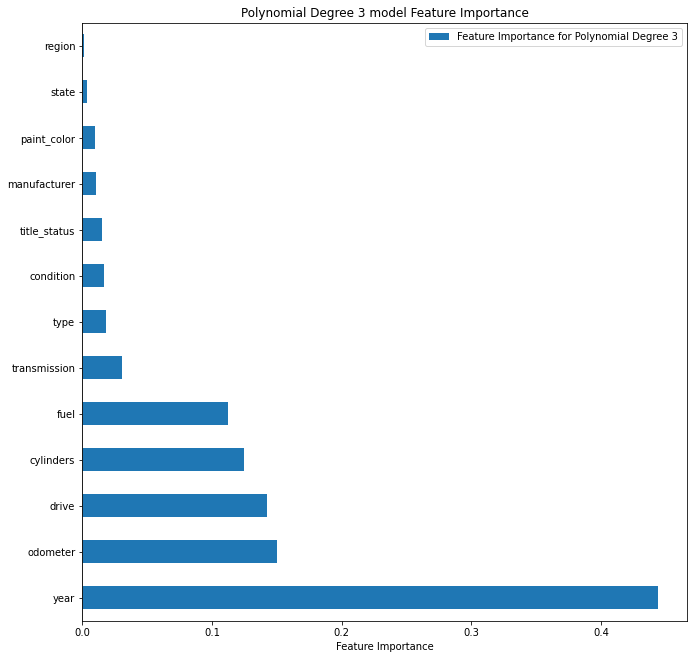

In [778]:
#Plot Feature importance
feature_importance_poly3.plot.barh(figsize=(14, 11))
plt.title("Polynomial Degree 3 model Feature Importance")
plt.axvline(x=0, color=".5")
plt.xlabel("Feature Importance")
plt.subplots_adjust(left=0.3)

In [765]:
#Coefficient Importance

feature_names = Poly3[:-1].get_feature_names_out()

coefs_Poly3 = pd.DataFrame(
    Poly3[-1].coef_,
    columns=["Coefficients"],
    index=feature_names,
)
coefs_Poly3.sort_values(by=['Coefficients'], ascending=False)

,Coefficients
transmission^3,8.503576e+10
transmission,2.440008e+10
year,5.970228e+03
drive^2,3.992361e+03
drive,2.244749e+03
...,...
year transmission,-1.277648e+03
drive^3,-2.099318e+03
cylinders^2,-3.510311e+03
odometer,-3.812505e+03


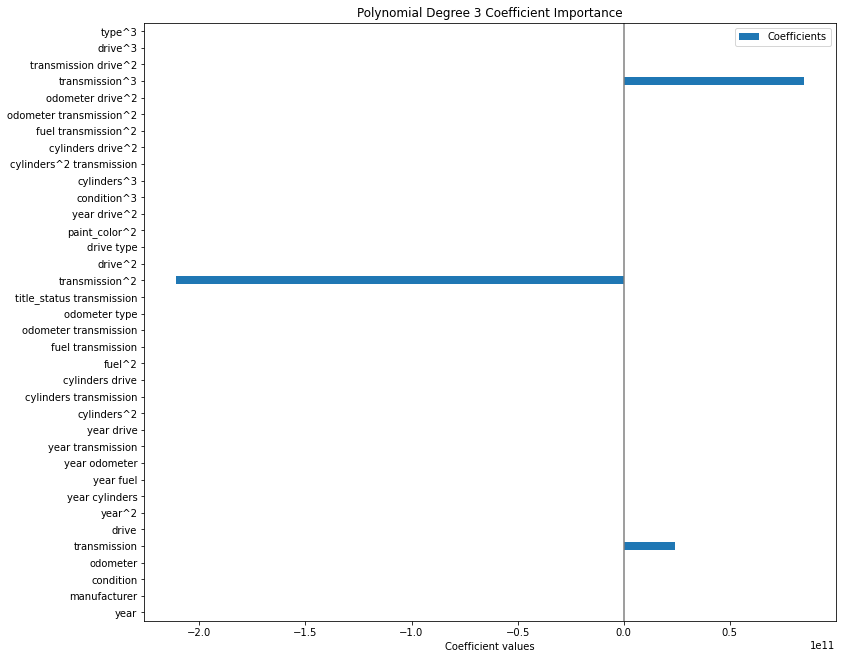

In [779]:
#plot coefficient importance
coefs_Poly3[abs(coefs_Poly3['Coefficients']) >500].plot.barh(figsize=(16, 11))
plt.title("Polynomial Degree 3 Coefficient Importance")
plt.axvline(x=0, color=".5")
plt.xlabel("Coefficient values")
plt.subplots_adjust(left=0.3)

Using permutation importance we can see that year was by far the best feature to predict the price variation.  

Other variables which impacted the price were odometer, drive, cylinders and fuel. Surprisingly, these features were very close in their predictive power. Something we were not capable to detect through our correlation matrix.

Interestingly, the transmission of the vehicle seem to impact greatly the price of a used vehicle. With year and drive being 2nd and 3rd when looking at the size of the coefficients

### Ridge Regression

In [647]:
#Building a pipeline for the ridge regression
Ridge_Poly3_pipe =  Pipeline([('scaler', StandardScaler()),
                     ('feature_transform', PolynomialFeatures(degree=3, include_bias=False)),
                       ('ridge', Ridge())])


#Perform ridge regression on the data
Ridge3 = Ridge_Poly3_pipe.fit(X_train, y_train)
train_predict=Ridge3.predict(X_train)
test_predict=Ridge3.predict(X_test)


#Regression Error
Ridge3_train_mse = mean_squared_error(train_predict, y_train)
Ridge3_test_mse = mean_squared_error(test_predict, y_test)
Ridge3_train_mae = mean_absolute_error(train_predict, y_train)
Ridge3_test_mae = mean_absolute_error(test_predict, y_test)



#Check
print(Ridge3)


print(f"Ridge Degree 3 Model: train_mse={Ridge3_train_mse}, test_mse={Ridge3_test_mse}")
print(f"Ridge Degree 3 Model: train_mae={Ridge3_train_mae}, test_mae={Ridge3_test_mae}")
print(Ridge3.score(X_test, y_test))

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_transform',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('ridge', Ridge())])
Ridge Degree 3 Model: train_mse=50254577.384463236, test_mse=49658175.039735116
Ridge Degree 3 Model: train_mae=4911.0404751814185, test_mae=4880.19803569022
0.694964767742327


Once again the ridge regression does not help a lot in the predictive power of our model. This model was extremely heavy to run and the GridSearch Ridge regression will be even harder to perform.

### GridSearch Ridge

Since this step will be very computationally heavy, I will focus on 4 values of alpha 1,10,100,1000 which will provide a rough idea of the best penalty term to be applied.

In [652]:
#Create the alpha parameter dictionary
param_dict = {'ridge__alpha':[1,10,100,1000]}

#GridSearch
Opt_Ridge3 = GridSearchCV(Ridge_Poly3_pipe, param_grid=param_dict)
Opt_Ridge3.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('feature_transform',
                                        PolynomialFeatures(degree=3,
                                                           include_bias=False)),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [1, 10, 100, 1000]})

In [653]:
#Use the Ridge to predict
train_predict=Opt_Ridge3.predict(X_train)
test_predict=Opt_Ridge3.predict(X_test)


#Regression Error
Opt_Ridge3_train_mse = mean_squared_error(train_predict, y_train)
Opt_Ridge3_test_mse = mean_squared_error(test_predict, y_test)
Opt_Ridge3_train_mae = mean_absolute_error(train_predict, y_train)
Opt_Ridge3_test_mae = mean_absolute_error(test_predict, y_test)



#Check
print(f"Opt_Ridge Degree 3 Model: train_mse={Opt_Ridge3_train_mse}, test_mse={Opt_Ridge3_test_mse}")
print(f"Opt_Ridge Degree 3 Model: train_mae={Opt_Ridge3_train_mae}, test_mae={Opt_Ridge3_test_mae}")
print(Opt_Ridge3.score(X_test, y_test))

Opt_Ridge Degree 3 Model: train_mse=50254963.708562545, test_mse=49659261.169706665
Opt_Ridge Degree 3 Model: train_mae=4910.7993330944455, test_mae=4879.917959674668
0.6949580959726159


In [654]:
best_alpha = Opt_Ridge3.best_params_
best_alpha

{'ridge__alpha': 100}

We can see that the best alpha was 100. Hence, the smoothness constraint is very high.

In [656]:
Optimal_Ridge_Pipeline =  Pipeline([('scaler', StandardScaler()),
                     ('feature_transform', PolynomialFeatures(degree=3, include_bias=False)),
                       ('ridge', Ridge(alpha = best_alpha['ridge__alpha']))])

Ridge_final = Optimal_Ridge_Pipeline.fit(X_train, y_train)
train_predict=Ridge_final.predict(X_train)
test_predict=Ridge_final.predict(X_test)


#Regression Error
Ridge_Final_train_mse = mean_squared_error(train_predict, y_train)
Ridge_Final_test_mse = mean_squared_error(test_predict, y_test)
Ridge_Final_train_mae = mean_absolute_error(train_predict, y_train)
Ridge_Final_test_mae = mean_absolute_error(test_predict, y_test)



#Check
print(f"Opt_Ridge Degree 3 Model: train_mse={Ridge_Final_train_mse}, test_mse={Ridge_Final_test_mse}")
print(f"Opt_Ridge Degree 3 Model: train_mae={Ridge_Final_train_mae}, test_mae={Ridge_Final_test_mae}")
print(Ridge_final.score(X_test, y_test))

Opt_Ridge Degree 3 Model: train_mse=50254963.708562545, test_mse=49659261.169706665
Opt_Ridge Degree 3 Model: train_mae=4910.7993330944455, test_mae=4879.917959674668
0.6949580959726159


Yet the r2 and MAE or MSE is very semilar across all the models we have performed.

In [657]:
# Using Premutation importance for selecting features

r = permutation_importance(Optimal_Ridge_Pipeline, X_test, y_test, n_repeats=30, random_state=42)
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2* r.importances_std[i] >0:
        print(f"{X_test.columns[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

year    0.444 +/- 0.002
odometer0.150 +/- 0.001
drive   0.142 +/- 0.001
cylinders0.125 +/- 0.002
fuel    0.112 +/- 0.001
transmission0.030 +/- 0.001
type    0.019 +/- 0.000
condition0.017 +/- 0.000
title_status0.015 +/- 0.000
manufacturer0.010 +/- 0.000
paint_color0.010 +/- 0.000
state   0.004 +/- 0.000
region  0.001 +/- 0.000


Using permutation importance we can see that year was by far the best feature to predict the price variation.  

Other variables which impacted the price were odometer, drive, cylinders and fuel. Surprisingly, these features were very close in their predictive power. Something we were not capable to detect through our correlation matrix.

This is a consistent result with the previous permutation we have performed

##### a K-Fold Ridge regression using GridSearchCV would be too computationally expensive to perform.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Modeling was much more challenging than expected. With hundred of thousands of observations and polynomial features my dataset was very heavy for my computer. I was still able to explore various regression models. Although we could of achieved a higher regression score using the polynomial of degree 4, I settle on a polynomial of degree 3 for two reasons.  
 1- The gain by increasing the degree of the polynomial was marginal in contrast to gains from increasing the regression to a degree 2 and 3. This leads to a less efficent shift on the graph of accuracy vs overfitting.  
 2- The degree 4 polynomial would of been very computationally heavy. Additionally, as we increase in polynomial degree the real world inference of such model decreases. For instance, price is not a polynomial degree 4 dependent of types of vehicles or of other features and interactions across features become increasingly hard to track.  

Overall, although I performed L1 and L2 normalization/regularization. The gain of such approach were negligeable. Across all models, it was apparent that the features impacting the most the variation of price was the year of the vehicle. Afterwards, variation in price were mostly allocated to the odometer, drive, cylinder and fuel. 

Selecting the polynomial of degree 3 as the best predictive model, I would like to offer the following insight. The model is offers an average error of +/- 4,880 dollars on the transaction price. The predicted price will be influence by the year of the vehicle. Hence, the newer the vehicle the higher the price. Looking at the coefficient of the regression model, we can conclude that the transmission has a positive impact on the price of the vehicle. Hence automatic vehicles are preferred. The year of the vehicle positively impacts the price of the vehicle. Similarly, the drive and the condition have a positive impact on the price.

To offer more insight additional information could be gathered, the dataset could be completed to have less NaN since these were counted as a seperate categor ('missing'). Additionally, providing a listing price vs. the transaction price would give a better understanding to the optimal pricing of vehicles for dealership. Furthemore, days in inventory would be an important metric to track and try to optimize the profit of a dealership.


In [777]:
coefs_Poly3.sort_values(by='Coefficients', ascending = False).head(10)

,Coefficients
transmission^3,8.503576e+10
transmission,2.440008e+10
year,5.970228e+03
drive^2,3.992361e+03
drive,2.244749e+03
condition,1.196457e+03
year^2,1.157209e+03
cylinders drive^2,1.087201e+03
paint_color^2,9.524256e+02
year cylinders,7.692977e+02


In [774]:
coefs_Poly3.sort_values(by='Coefficients', ascending = False).tail(10)

,Coefficients
year odometer,-7.461000e+02
odometer drive^2,-7.612188e+02
year drive,-9.599400e+02
odometer transmission,-1.096971e+03
cylinders^3,-1.144148e+03
year transmission,-1.277648e+03
drive^3,-2.099318e+03
cylinders^2,-3.510311e+03
odometer,-3.812505e+03
transmission^2,-2.111617e+11


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

Simply put, upon collecting, organizing and analyzing the data provided I was able to gather the following insight.


To maximize the price at which a vehicle is sold, dealerships should focus in order of importance on:  
1- Year of the vehicle -- the younger the better  
2- The odometer -- the lower the km the better  
3- the drive -- higher value when forward or rear wheel  
4- Cylinders -- the bigger the engine the more expensive the car  
5- Fuel -- gas has higher value  
6- transmission -- an automatic transmission will greatly impact the value of the price  
(full list in the figure below)

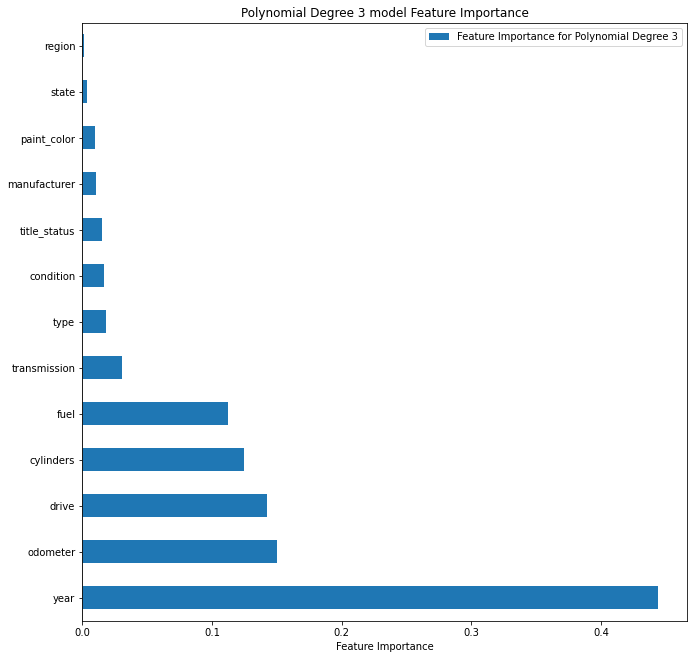

In [775]:
feature_importance_poly3.plot.barh(figsize=(14, 11))
plt.title("Polynomial Degree 3 model Feature Importance")
plt.axvline(x=0, color=".5")
plt.xlabel("Feature Importance")
plt.subplots_adjust(left=0.3)

By focusing on the 6 attributes to select the vehicles in their inventoy. Dealerships will be able to optimize their inventory. It is important to note that a limitation of this model is the expected profit and inventory turnover. The model does not consider such impacts. Hence, the model would need additional data in this area to offer a proper picture to optimize profits and revenue. For instance, although it is true that the bigger the engine the higher the price. If a dealership only stocks 10 cylinder vehicles, it is unlikely that they will have the clientel to sell these vehicles. This may yield in much lower profits and revenue.  

Hence, these are areas to explore in the future. Furthermore, logarithmic transformation may yield better results for inferences than a standard polynomial of degree 3 model.